In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=16vZpn51OWRyTPSMmSrwF4HySFEdCVS3d
!gdown https://drive.google.com/uc?id=1NYp-nCPhMZPBEhJ__5znZrHAdGZ6x-T3



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Downloading...
From: https://drive.google.com/uc?id=16vZpn51OWRyTPSMmSrwF4HySFEdCVS3d
To: c:\Users\ikeni\OneDrive\Desktop\Code\Numpytesting\Data Visualization.py\USA.xlsx

  0%|          | 0.00/244k [00:00<?, ?B/s]
100%|██████████| 244k/244k [00:00<00:00, 1.66MB/s]
100%|██████████| 244k/244k [00:00<00:00, 1.66MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NYp-nCPhMZPBEhJ__5znZrHAdGZ6x-T3
To: c:\Users\ikeni\OneDrive\Desktop\Code\Numpytesting\Data Visualization.py\Canada.xlsx

  0%|          | 0.00/235k [00:00<?, ?B/s]
100%|██████████| 235k/235k [00:00<00:00, 481kB/s]
100%|██████████| 235k/235k [00:00<00:00, 481kB/s]


In [3]:
df_usa = pd.read_excel(
    './USA.xlsx',
    sheet_name='USA by Place of birth',
    skiprows=range(20),
    skipfooter=2)
print('Data for USA read into a pandas dataframe!')

Data for USA read into a pandas dataframe!


Cleaning data by dropping uneeded columns

In [4]:
df_usa.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_usa.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

Set country as index

In [5]:
df_usa.set_index('Country',inplace=True)
years=list(range(1980,2014))

Replace non numerical values in the dataset with 0

In [6]:
df_usa.replace("..", 0, inplace = True)
df_usa.replace("D", 0, inplace = True)
df_usa.replace("-", 0, inplace = True)

Set a range of years from 1980 to 2013

In [ ]:
years=list(range(1980,2014))
df_usa.head()

Create a Total column for the sum of immigrants

In [ ]:
df_usa['Total']=df_usa.sum(axis=1, numeric_only = True)
df_usa.head()

Sort the totals in descending order

In [ ]:
df_usa.sort_values(['Total'],ascending=False, axis=0, inplace=True)
df_usa.head()

Create a totals row for countries

In [ ]:
a = df_usa.sum(numeric_only = True)
df_usa.loc['Row_Total']= a
print(df_usa.tail())

Creat a line of code for the top 5 countries

In [ ]:
df_usa_top5=df_usa.head()
df_usa_top5=df_usa_top5[years]
df_usa_top5=df_usa_top5.transpose()
df_usa_top5

Create a totals column for the years

In [ ]:
df_usa_top5['Total']=df_usa_top5.sum(axis=1, numeric_only = True)
df_usa_top5.head()

Create a line plot to display the top 5 countries' immigration to the US by year and the total immigration for each year

In [ ]:
df_usa_top5.plot(figsize=(15,8))

Plot a totals line for the top 5 countries' immigration to the USA by year

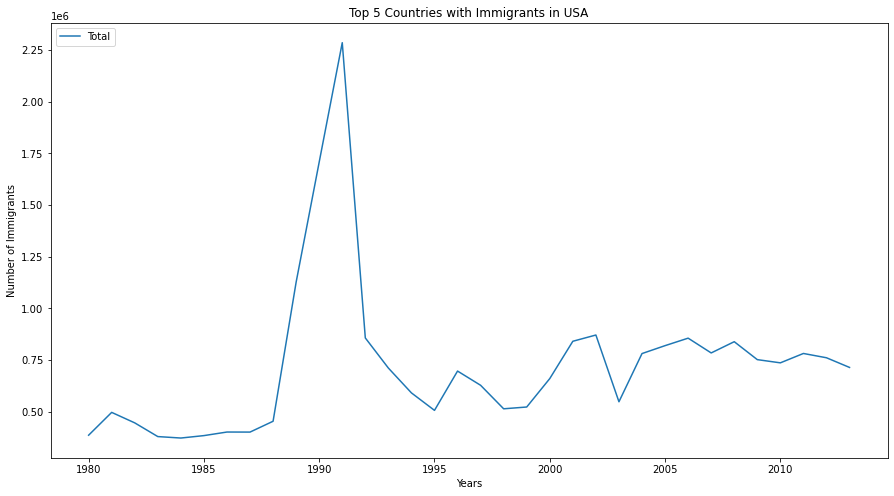

In [25]:
df_usa_top5['Total'].plot(figsize=(15,8))
plt.title('Top 5 Countries with Immigrants in USA')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.legend(loc=2, prop={'size':10})
plt.show()